### Import dependencies

In [1]:
# pip install imbalanced-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### Data Loading

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.shape

(7043, 21)

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
pd.set_option("display.max_columns", None)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# dropping customerID column 
df = df.drop(columns=['customerID'])

In [10]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
print(df['gender'].unique())

['Female' 'Male']


### Printing the unique values in all columns


In [12]:

for col in df.columns:
    print(col, df[col].unique())
    

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

### Categorical and Numerical Features

In [13]:
categorical_features = df.select_dtypes(include='object')
print(categorical_features.columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')


In [14]:
numerical_features = df.select_dtypes(exclude='object')
print(numerical_features.columns)

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


### Checking the missing values

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
len(df[df["TotalCharges"] == " "])

11

In [17]:
df["TotalCharges"] = df["TotalCharges"].replace({" ": "0.0"})

In [18]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### Checking the class distribution of target column

In [21]:
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


#### Insights:
#### 1. CustomerID removed as it is not needed for modeling
#### 2. Missing values in the TotalCharges column were replaced with 0
#### 3. Class imbalance identified in the target

### EDA

In [22]:
df.shape

(7043, 20)

In [23]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


### Numerical features Analysis

#### Histogram

In [25]:
def plot_histogram(df, column_name):
    plt.figure(figsize=(6,4))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Distribution of {column_name}")

     #calculate the mean and median values for the columns
    col_mean = df[column_name].mean()
    col_median = df[column_name].median()

    # add vertical lines for mean and median
    plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
    plt.axvline(col_median, color="green", linestyle="-", label="Median")

    plt.legend()
    
    plt.show()

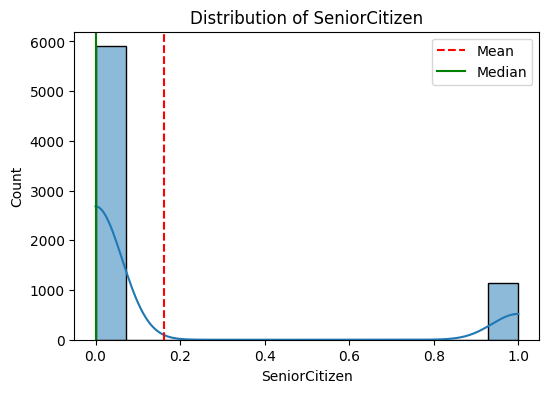

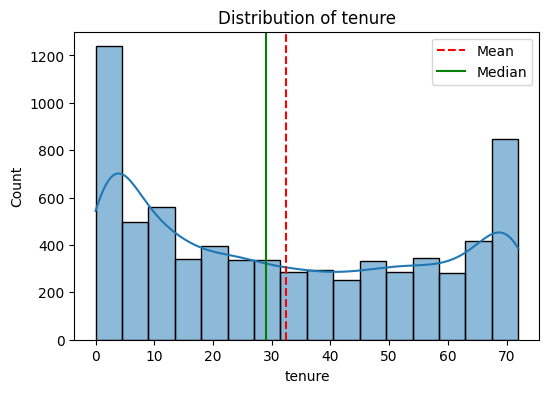

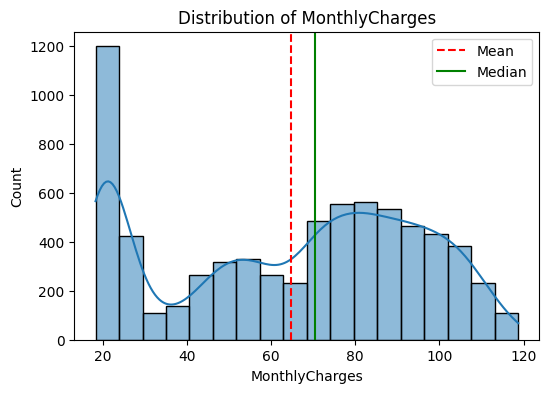

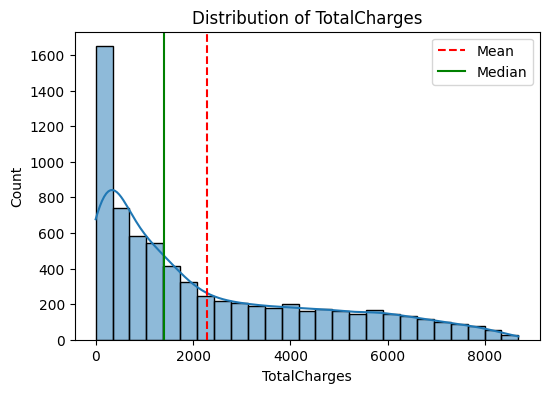

In [26]:
for col in df.select_dtypes(exclude='object').columns:
    plot_histogram(df,col)

#### Box Plot

In [27]:
def plot_boxplot(df, column_name):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[column_name])
    plt.title(f"Distribution of {column_name}")
    plt.ylabel(column_name)
    plt.show

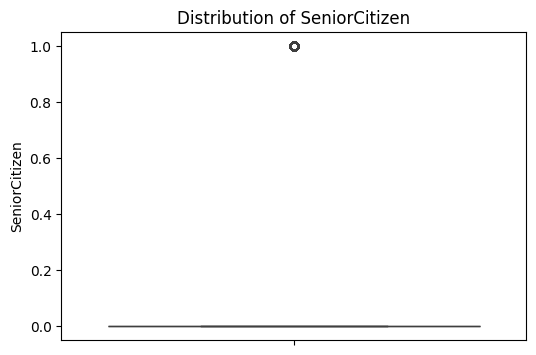

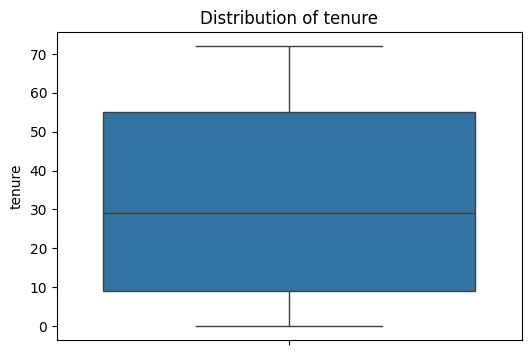

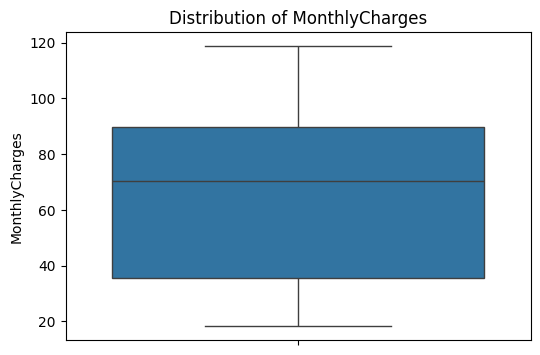

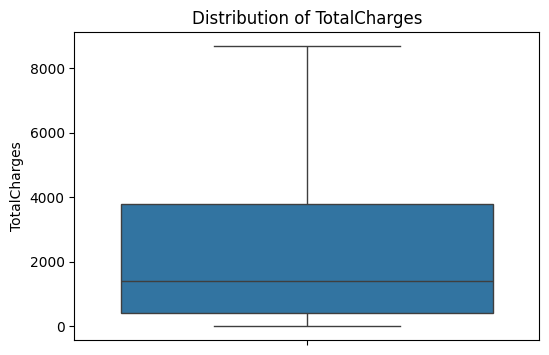

In [28]:
for col in df.select_dtypes(exclude='object').columns:
    plot_boxplot(df,col)

### Correlation Matrix - Heatmap

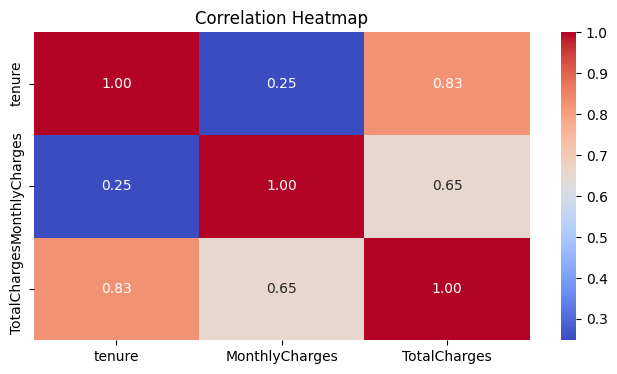

In [29]:
plt.figure(figsize=(8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### Categorical Analysis

In [30]:
object_cols = df.select_dtypes(include="object").columns.tolist()
object_cols = ["SeniorCitizen"] + object_cols
object_cols

['SeniorCitizen',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

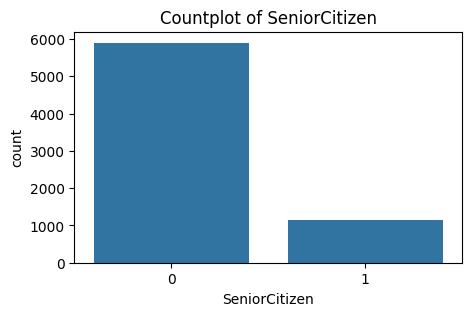

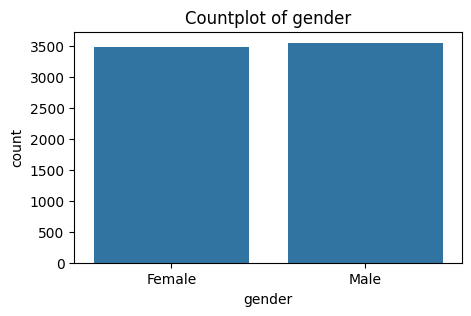

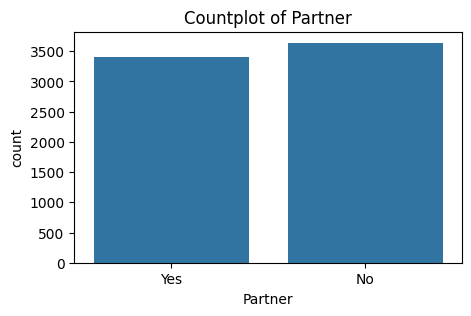

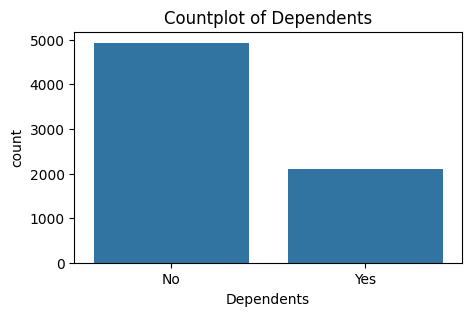

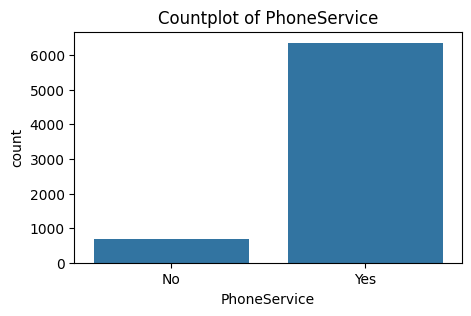

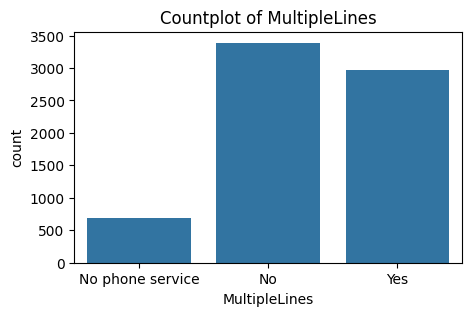

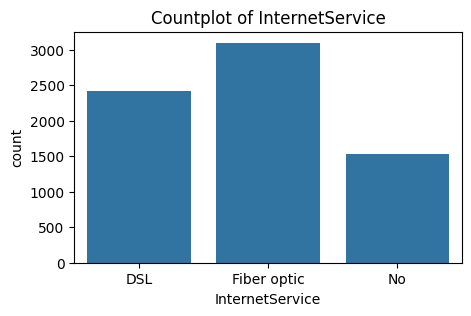

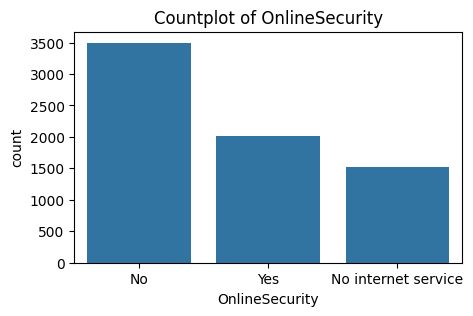

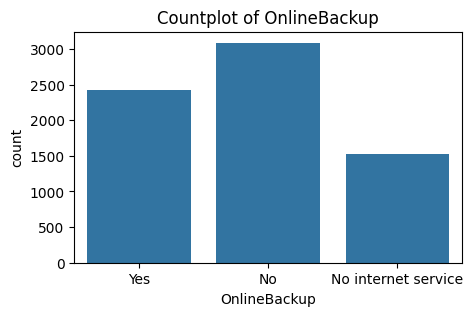

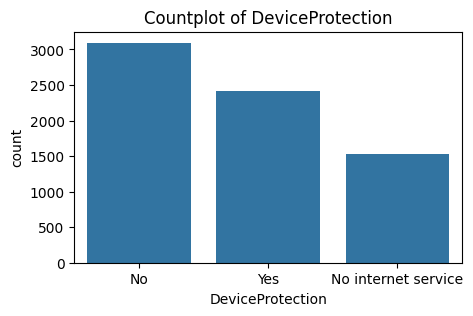

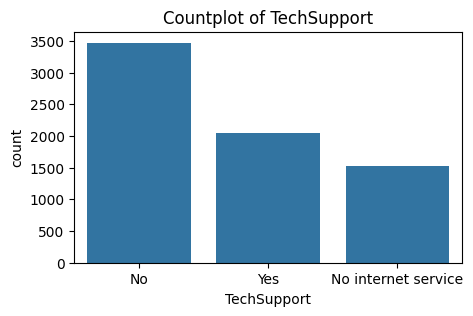

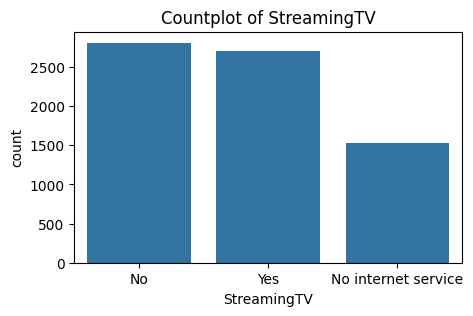

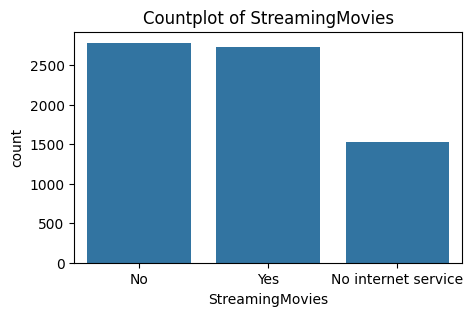

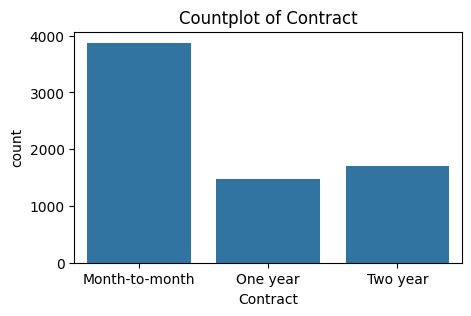

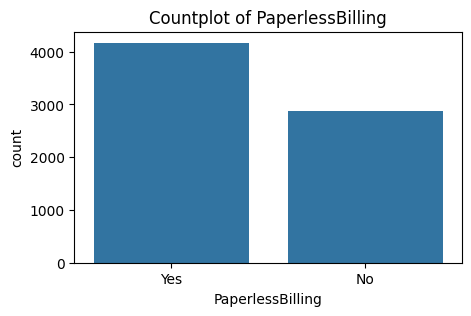

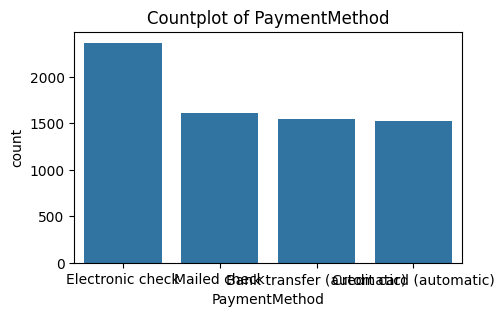

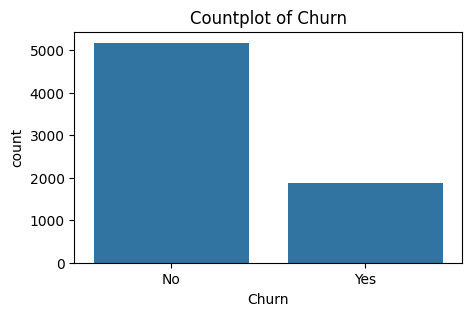

In [31]:
for col in object_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=df[col])
    plt.title(f"Countplot of {col}")
    plt.show()

## Data Preprocessing

In [32]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Label encoding of target column

In [33]:
df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_19852\196801821.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({"Yes": 1, "No": 0})


In [34]:
df.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [35]:
print(df['Churn'].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


### Label Encoding the Categorical Columns

In [36]:
# identifying columns with object data type
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [37]:
# initialize a dictionary to save the encoders

encoders = {}
 # apply label encoding and store the encoders
 
for column in object_cols:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder
    


In [38]:
# save the encoders to a pickle file

import pickle


with open('encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [39]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [40]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


## Train Test Split

In [41]:
# splitting the data into features and target variable

X = df.drop(columns=['Churn'])
y = df['Churn']

In [42]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [43]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64


In [44]:
# split train and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
print(y_train.shape)

(5634,)


In [46]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


#### Synthetic Minority Over-sampling Technique (SMOTE)

In [47]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [48]:
print(y_train_smote.shape)

(8276,)


In [49]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


## Model Training

In [50]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),  
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }

In [51]:
# # dictionary to store cross-validation results

# cv_scores = {}

# # perform 5-fold cross-validation for each model

# for model_name, model in models.items():
#     print(f"Training {model_name} with default parameters")
#     scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy')
#     cv_scores[model_name] = scores
#     print(f"{model_name} Cross-Validation Accuracy: {np.mean(scores)}")
#     print("-" * 50)

In [52]:
# cv_scores

In [53]:
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    
    print(f"--- {name} (No Tuning) ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

--- Decision Tree (No Tuning) ---
Accuracy: 0.7210787792760823
Confusion Matrix:
 [[809 227]
 [166 207]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80      1036
           1       0.48      0.55      0.51       373

    accuracy                           0.72      1409
   macro avg       0.65      0.67      0.66      1409
weighted avg       0.74      0.72      0.73      1409



--- Random Forest (No Tuning) ---
Accuracy: 0.7771469127040455
Confusion Matrix:
 [[880 156]
 [158 215]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.78      0.78      0.78      1409



--- Gradient Boosting (No Tuning) ---
Accuracy: 0.7757274662881476
Confusion Matrix:

#### Hyperparameter Tuning using RandomizedSearchCV

#### Random Forest

In [54]:
# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

# number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']

# maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, 10)]

# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 14]

# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8]

# create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': ['entropy', 'gini'] 
}

print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 21, 32, 43, 54, 65, 76, 87, 98, 110], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_randomcv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_randomcv.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 98,
 'criterion': 'gini'}

In [ ]:
import joblib
joblib.dump(rf_randomcv, 'rf_randomcv_best.pkl')

['rf_randomcv_best.pkl']

In [ ]:
rf_randomcv = joblib.load('rf_randomcv_best.pkl')

print(rf_randomcv.best_params_)

{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 98, 'criterion': 'gini'}


In [ ]:
best_rf = rf_randomcv.best_estimator_

In [ ]:
best_rf

RandomForestClassifier(max_depth=98, min_samples_split=5, n_estimators=1400)

#### Evaluation for Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy : {acc:.4f}")

# ---- 5.2 Classification report -----------------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# ---- 5.3 Confusion matrix ----------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)



Test Accuracy : 0.7842

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.84      0.85      1036
       Churn       0.59      0.62      0.61       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.73      1409
weighted avg       0.79      0.78      0.79      1409


Confusion Matrix:
[[872 164]
 [140 233]]


#### Decision Tree

In [ ]:
# create the random grid
dt_random_grid = {
    'max_depth': [int(x) for x in np.linspace(5, 50, 10)] + [None],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2', None],  
    'splitter': ['best', 'random']
}

print(dt_random_grid)

{'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2', None], 'splitter': ['best', 'random']}


In [ ]:
dt = DecisionTreeClassifier()
dt_randomcv = RandomizedSearchCV(estimator=dt, param_distributions=dt_random_grid, n_iter=100, cv=3, scoring='f1', verbose=2, random_state=42, n_jobs=-1)
dt_randomcv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
joblib.dump(dt_randomcv, 'dt_randomcv_best.pkl')


['dt_randomcv_best.pkl']

In [ ]:
dt_randomcv = joblib.load('dt_randomcv_best.pkl')

In [ ]:
print(dt_randomcv.best_params_)


{'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'criterion': 'entropy'}


In [ ]:
best_dt = dt_randomcv.best_estimator_

In [ ]:
print(best_dt)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2)


#### Evaluation for Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy : {acc:.4f}")

# ---- 5.2 Classification report -----------------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# ---- 5.3 Confusion matrix ----------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Test Accuracy : 0.7339

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.86      0.76      0.81      1036
       Churn       0.50      0.67      0.57       373

    accuracy                           0.73      1409
   macro avg       0.68      0.71      0.69      1409
weighted avg       0.77      0.73      0.74      1409


Confusion Matrix:
[[785 251]
 [124 249]]


#### Gradient Boosting

In [ ]:
gb_random_grid = {
    'n_estimators': [int(x) for x in np.linspace(100, 1000, 10)],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

print(gb_random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3], 'max_depth': [3, 4, 5, 6, 7, 8], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'subsample': [0.8, 0.9, 1.0], 'max_features': ['sqrt', 'log2', None]}


In [ ]:
gb = GradientBoostingClassifier()
gb_randomcv = RandomizedSearchCV(estimator=gb, param_distributions=gb_random_grid, n_iter=100, cv=3, scoring='f1', verbose=2, random_state=42, n_jobs=-1)

gb_randomcv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2,
                                                          0.3],
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='f1', verbose=2)

In [ ]:
joblib.dump(gb_randomcv, 'gb_randomcv_best.pkl')


['gb_randomcv_best.pkl']

In [ ]:
gb_randomcv = joblib.load('gb_randomcv_best.pkl')

In [ ]:
print(gb_randomcv.best_params_)


{'subsample': 1.0, 'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 6, 'learning_rate': 0.01}


In [ ]:
best_gb = gb_randomcv.best_estimator_

print(best_gb)

GradientBoostingClassifier(learning_rate=0.01, max_depth=6, min_samples_split=5,
                           n_estimators=200)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = best_gb.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy : {acc:.4f}")

# ---- 5.2 Classification report -----------------------------------
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

# ---- 5.3 Confusion matrix ----------------------------------------
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Test Accuracy : 0.7729

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.89      0.79      0.84      1036
       Churn       0.55      0.73      0.63       373

    accuracy                           0.77      1409
   macro avg       0.72      0.76      0.73      1409
weighted avg       0.80      0.77      0.78      1409


Confusion Matrix:
[[815 221]
 [ 99 274]]
